In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import powerlaw
warnings.filterwarnings('ignore')

In [4]:
#pip install powerlaw

In [248]:
g = nx.Graph()

# Read data from CSV file
with open('weighted_graph.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    for row in reader:
        source, target, weight = row
        g.add_edge(source, target, weight=float(weight))

len(g.edges())

725330

In [3]:
#pip install cdlib
import cdlib

In [4]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


## loauvain

In [9]:
from cdlib import ensemble
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
parameters = [resolution]

In [10]:
louvain_coms, scoring = ensemble.grid_search(graph=g, method=algorithms.louvain,
                                                       parameters=parameters,
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)

In [16]:
print("Configuration: %s \nScoring: %s" %(louvain_coms.method_parameters, scoring))

Configuration: {'weight': 'weight', 'resolution': 0.9, 'randomize': None} 
Scoring: FitnessResult(min=None, max=None, score=0.6115354515228132, std=None)


In [18]:
louvain_coms = cdlib.algorithms.louvain(g, weight = "Count", resolution=0.9)

In [22]:
artist_df =pd.read_csv('C:/Users/Pierfrancesco/Desktop/Data Science and Business Informatics/Social Network Analysis/PROJECT/artisti_df.csv')

## -Quali comunità di artisti esistono nella rete basata sui tag comuni? Come sono distribuiti i generi musicali all'interno di queste comunità?


In [96]:
variabili = dict
for i in range(5):
    filtered_df =  artist_df[artist_df['name'].isin(louvain_coms.communities[i])]
    melted_df = pd.melt(filtered_df, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                    var_name='GenereCol', value_name='Genere')
    conteggio_generi = melted_df['Genere'].value_counts()
    exec(f'Series{i+1} = conteggio_generi')

In [108]:
Series2[:10].values

array([872, 619, 602, 544, 477, 294, 262, 252, 240, 163], dtype=int64)

community length {2678}
community length {1647}
community length {1052}
community length {973}


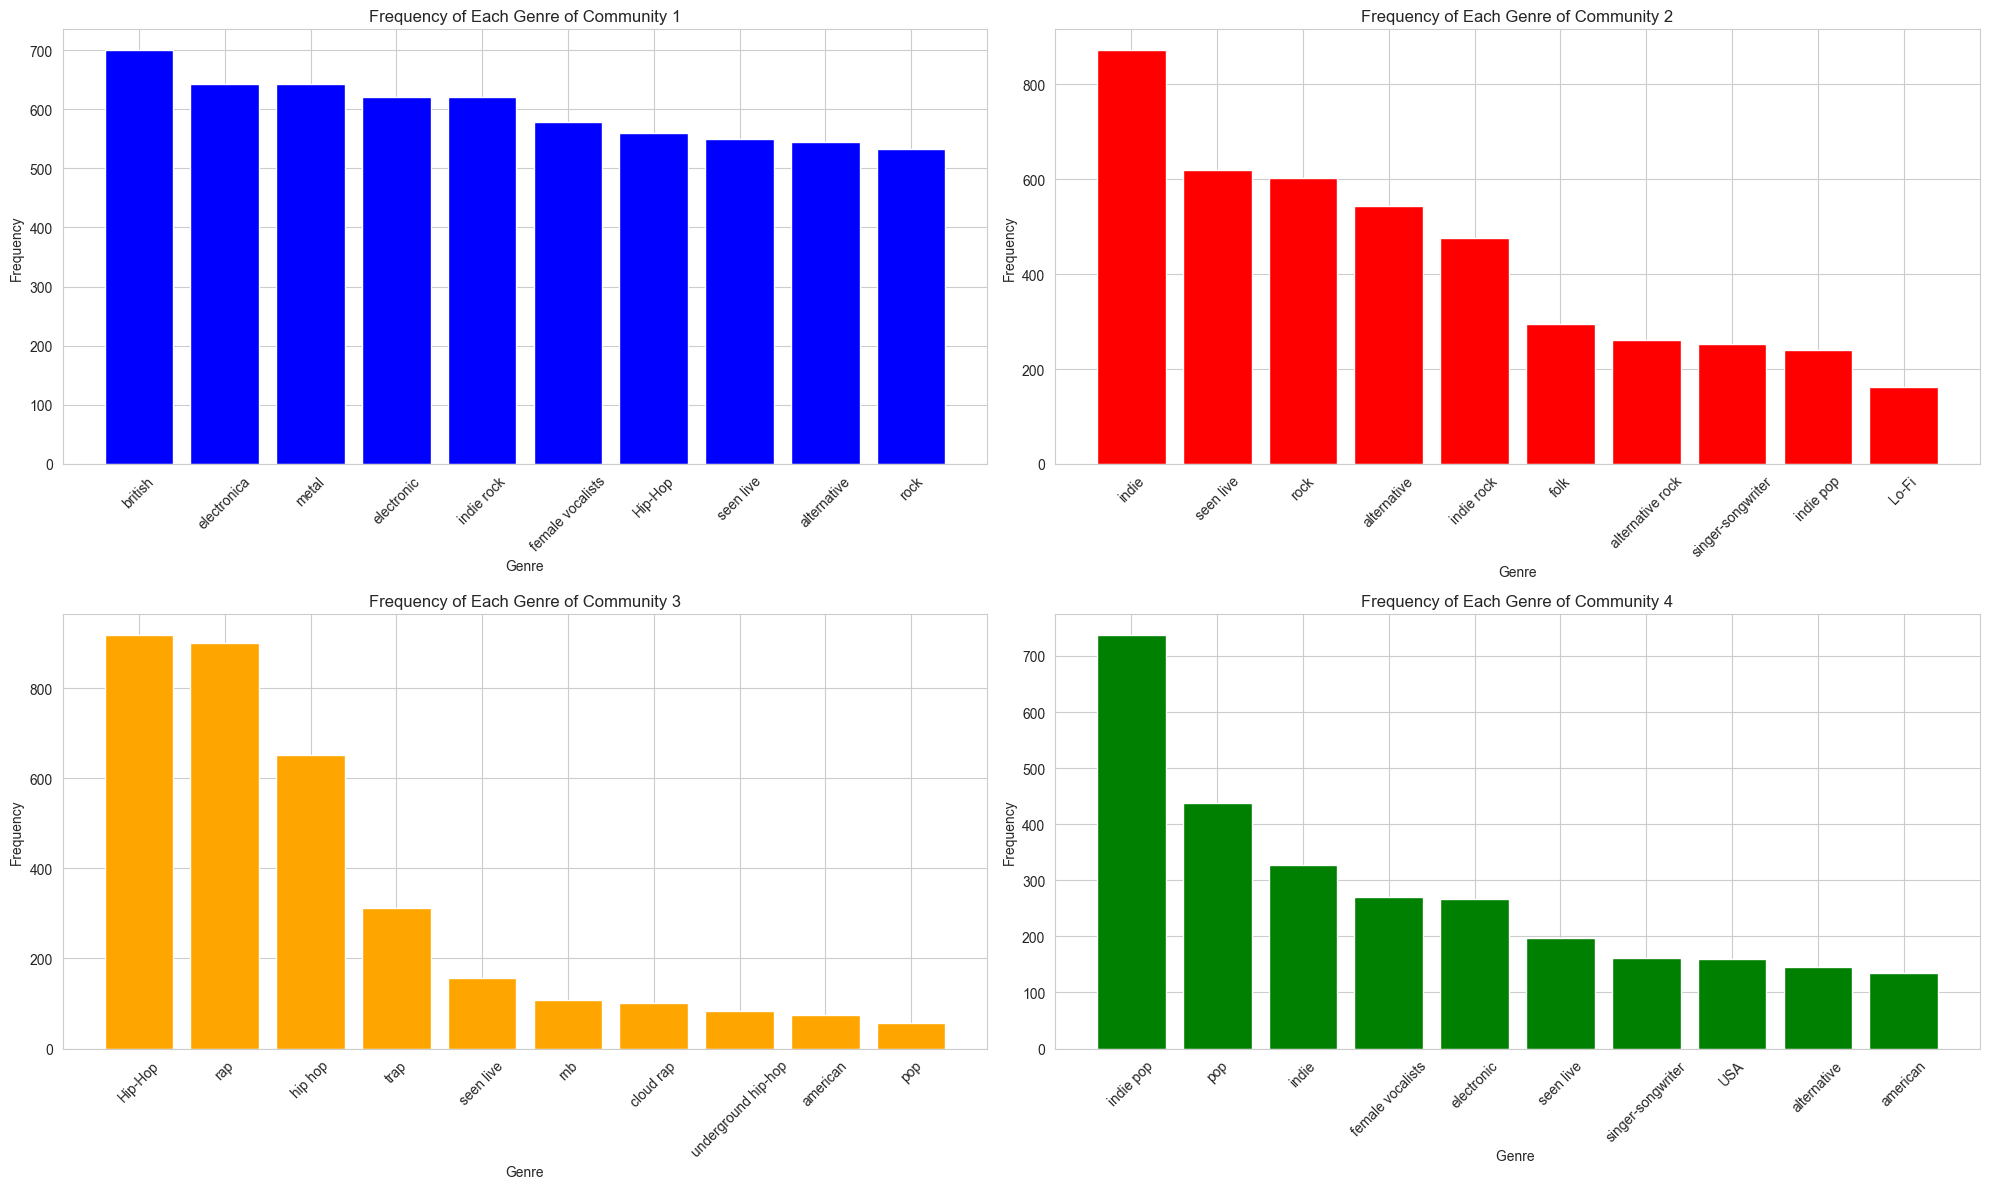

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
[print(f'community length',{len(i)} ) for i in louvain_coms.communities[:4]]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
 
# Plot the first bar chart
ax1.bar(Series1[:10].index, Series1[:10].values , color='blue')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Each Genre of Community 1')
ax1.set_xticks(range(len(Series1[:10].index)))
ax1.set_xticklabels(Series1[:10].index, rotation=45)
 
# Plot the second bar chart
ax2.bar(Series2[:10].index, Series2[:10].values , color='red')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Each Genre of Community 2')
ax2.set_xticks(range(len(Series2[:10].index)))
ax2.set_xticklabels(Series2[:10].index, rotation=45)
 
# Plot the third bar chart
ax3.bar(Series3[:10].index, Series3[:10].values , color='orange')
ax3.set_xlabel('Genre')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Each Genre of Community 3')
ax3.set_xticks(range(len(Series3[:10].index)))
ax3.set_xticklabels(Series3[:10].index, rotation=45)
# Plot the fourth bar chart
ax4.bar(Series4[:10].index, Series4[:10].values , color='green')
ax4.set_xlabel('Genre ')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Each Genre of Community 4')
ax4.set_xticks(range(len(Series4[:10].index)))
ax4.set_xticklabels(Series4[:10].index, rotation=45)
 
# Adjust layout
plt.tight_layout()
plt.show()



### CREAZIONE SUBGRAPH PARTENDO DAI NOMI DELLA COMMUNITY

In [265]:
# Read data from CSV file
full_graph = pd.read_csv('weighted_graph.csv')

In [267]:
g1 = nx.Graph()
import networkx as nx
import pandas as pd

# Carica il file CSV
df = pd.read_csv("weighted_graph.csv")
# Aggiungi gli archi al grafo
for _, row in df.iterrows():
    g1.add_edge(row['Source'], row['Target'], weight = float(row['Weight']))

# Visualizza il numero di nodi e archi nel grafo
print("Numero di nodi:", g1.number_of_nodes())
print("Numero di archi:", g1.number_of_edges())

Numero di nodi: 10042
Numero di archi: 725330


## -Ci sono tag specifici che tendono a formare cluster di artisti? Quali tag sono i più comuni tra i cluster più grandi?

## COMMUNITY 0

In [ ]:
name_c0 = louvain_coms.communities[0]
sub_g0 =  full_graph[full_graph['Source'].isin(name_c0)]
# Creazione del sottografo utilizzando i nodi di interesse
subgraph0 = g1.subgraph(name_c0)

print("Numero di nodi:", subgraph0.number_of_nodes())
print("Numero di archi:", subgraph0.number_of_edges())
degree_centrality0 = nx.degree_centrality(subgraph0)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", degree_centrality0)
degree_centrality0 = nx.degree_centrality(subgraph0)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", degree_centrality0)
ranks0 = [(k, v) for k, v in sorted(degree_centrality0.items(), key=lambda item: -item[1])]
ranks0[0:10]

dftop_degree_centrality0 = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks0[0:10]])]
dftop_degree_centrality0 

dftop_degree_centrality_df = pd.melt(dftop_degree_centrality0, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')
dftop_degree_centrality_df['Genere'].value_counts()

In [264]:
name_c0 = louvain_coms.communities[0]

In [266]:
sub_g0 =  full_graph[full_graph['Source'].isin(name_c0)]

In [268]:
# Creazione del sottografo utilizzando i nodi di interesse
subgraph0 = g1.subgraph(name_c0)

In [269]:

print("Numero di nodi:", subgraph0.number_of_nodes())
print("Numero di archi:", subgraph0.number_of_edges())

Numero di nodi: 2678
Numero di archi: 201403


In [270]:
degree_centrality0 = nx.degree_centrality(subgraph0)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", degree_centrality0)

Degree Centrality del sottografo: {'Madeleine Bruins': 0.07732536421367202, 'Ced MacCague': 0.05304445274561076, 'Hephzibah Tumility': 0.0556593201344789, 'Mordecai Marler': 0.061636159880463205, 'Isidore Barthelemy': 0.0635039223010833, 'Edmon Jozwiak': 0.06649234217407546, 'Elfrieda Dickerline': 0.05827418752334703, 'Emmye Pedlingham': 0.06499813223757939, 'Dominique Boatright': 0.057527082555098995, 'Findlay Simao': 0.06686589465819948, 'Fritz Dryden': 0.06574523720582742, 'Charmine Caps': 0.05528576765035488, 'Duffie Torrans': 0.0672394471423235, 'Max Cosans': 0.056032872618602916, 'Lee Franiak': 0.06275681733283527, 'Ethan Bortnick': 0.007097497198356369, 'Garwood Verbrugghen': 0.04930892790437057, 'Sammy Virji': 0.010085917071348524, 'Libbey Chomley': 0.07209562943593575, 'Bonny Chadwell': 0.06985431453119163, 'Alaric Stormouth': 0.06611878968995144, 'Kurtis Pinare': 0.05827418752334703, 'Filippa Sjollema': 0.06275681733283527, 'Garald Cheng': 0.06126260739633919, 'Tarrah Pyrke':

In [271]:
ranks0 = [(k, v) for k, v in sorted(degree_centrality0.items(), key=lambda item: -item[1])]
ranks0[0:10]

[('Nina Brundill', 0.08143444153903624),
 ('Chere Colpus', 0.08143444153903624),
 ('Bondon Grout', 0.08106088905491222),
 ('Jeanie Valentelli', 0.07994023160254016),
 ('Desi Balazs', 0.07956667911841614),
 ('Thomasina Adamkiewicz', 0.07956667911841614),
 ('Oren Stitle', 0.0788195741501681),
 ('Gonzalo Coplestone', 0.0788195741501681),
 ('Pablo Maud', 0.0788195741501681),
 ('Raymond Melland', 0.07844602166604409)]

In [272]:
dftop_degree_centrality0 = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks0[0:10]])]
dftop_degree_centrality0 

0                 1            2      3             4  \
230    alternative               USA      british  metal     brazilian   
747           rock          american      british  metal  instrumental   
944    alternative               USA      british  metal     brazilian   
1849   alternative               USA      british  metal     brazilian   
9765     seen live        electronic  electronica    rap  experimental   
9788   alternative  female vocalists      british  metal     brazilian   
9915     seen live        electronic  electronica    rap  experimental   
10124         rock          american      british  metal  instrumental   
10440  alternative  female vocalists      british    rap  instrumental   
10463    seen live        electronic  electronica    rap  experimental   

                        name  
230             Chere Colpus  
747              Oren Stitle  
944             Bondon Grout  
1849           Nina Brundill  
9765              Pablo Maud  
9788       Jeanie Valentelli  
9915   Thomasina Adamkiewicz  
10124     Gonzalo Coplestone  
10440        Raymond Melland  
10463            Desi Balazs

In [273]:
dftop_degree_centrality_df = pd.melt(dftop_degree_centrality0, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')
dftop_degree_centrality_df['Genere'].value_counts()

Genere
british             7
metal               6
alternative         5
rap                 4
brazilian           4
seen live           3
USA                 3
electronic          3
electronica         3
instrumental        3
experimental        3
rock                2
american            2
female vocalists    2
Name: count, dtype: int64

#### BETWEENNESS 0

In [274]:
betweenness_centrality0 = nx.betweenness_centrality(subgraph0)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", betweenness_centrality0)

Degree Centrality del sottografo: {'Madeleine Bruins': 0.0007468683685590204, 'Ced MacCague': 0.00045696950905077885, 'Hephzibah Tumility': 0.0005051859004773291, 'Mordecai Marler': 0.00046152349307153757, 'Isidore Barthelemy': 0.0004839057199366422, 'Edmon Jozwiak': 0.0006698088238856619, 'Elfrieda Dickerline': 0.000533616410291124, 'Emmye Pedlingham': 0.0006016980807808695, 'Dominique Boatright': 0.0004286268690181082, 'Findlay Simao': 0.0006103563982142435, 'Fritz Dryden': 0.0005668091076863782, 'Charmine Caps': 0.0004242143517399567, 'Duffie Torrans': 0.0010796280071764123, 'Max Cosans': 0.000596956660832929, 'Lee Franiak': 0.0005592961802365329, 'Ethan Bortnick': 0.0, 'Garwood Verbrugghen': 0.00032004051613160545, 'Sammy Virji': 4.484462349617992e-07, 'Libbey Chomley': 0.0010461448011138085, 'Bonny Chadwell': 0.0006406618145959383, 'Alaric Stormouth': 0.0005533619073370126, 'Kurtis Pinare': 0.00040813652971009336, 'Filippa Sjollema': 0.0005675866830676302, 'Garald Cheng': 0.000465

In [275]:
ranks0_ = [(k, v) for k, v in sorted(betweenness_centrality0.items(), key=lambda item: -item[1])]
ranks0_[0:10]
dftop_betw_centrality = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks0_[0:10]])]
dftop_betw_centrality_df = pd.melt(dftop_betw_centrality, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')
dftop_betw_centrality_df['Genere'].value_counts()

Genere
electronic           8
experimental         6
british              5
pop                  4
Hip-Hop              4
rap                  4
seen live            4
electronica          2
rock                 2
alternative          2
UK                   2
folk rock            1
alt-folk             1
folk                 1
singer-songwriter    1
trap                 1
metal                1
ambient              1
Name: count, dtype: int64

## COMMUNITY 1

In [133]:
last_df = pd.read_csv("artisti_df.csv")

In [204]:
name_c1 = louvain_coms.communities[1]

In [205]:
sub_g1 =  full_graph[full_graph['Source'].isin(name_c1)]

In [224]:
G = nx.Graph()
# Creazione del sottografo utilizzando i nodi di interesse
subgraph = g1.subgraph(name_c1)

In [225]:

print("Numero di nodi:", subgraph.number_of_nodes())
print("Numero di archi:", subgraph.number_of_edges())

Numero di nodi: 1647
Numero di archi: 97769


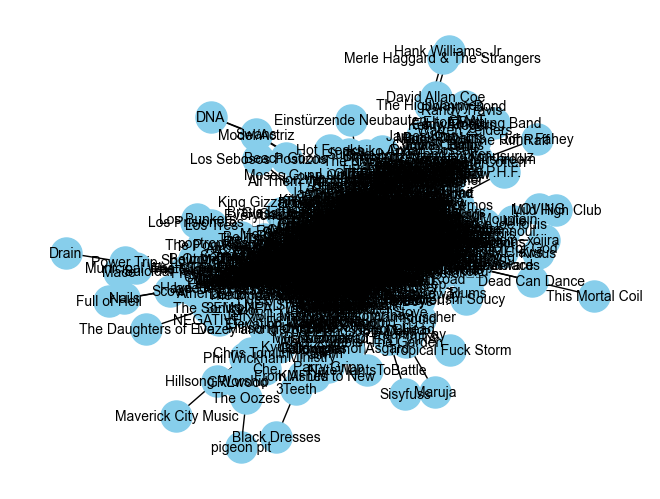

In [210]:
# Puoi anche disegnare il sottografo se hai matplotlib installato
nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')
plt.show()

In [211]:
degree_centrality = nx.degree_centrality(subgraph)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", degree_centrality)

Degree Centrality del sottografo: {'As It Is': 0.038882138517618466, 'Never Shout Never': 0.006075334143377885, 'Len': 0.03645200486026731, 'The 1975': 0.20291616038882138, 'Circa Survive': 0.09477521263669501, 'Patti Smith': 0.040097205346294046, 'Fox Academy': 0.034629404617253945, 'Yellow Days': 0.02065613608748481, 'Black Rebel Motorcycle Club': 0.22660996354799512, 'Monsieur Periné': 0.002430133657351154, 'Hovvdy': 0.022478736330498177, 'Tame Impala': 0.013365735115431347, 'Unknown Mortal Orchestra': 0.14641555285540703, 'Le Tigre': 0.026731470230862694, 'The Handsome Family': 0.01640340218712029, 'blue smiley': 0.019441069258809233, 'Mazzy Star': 0.04981773997569866, 'Fleece': 0.00425273390036452, 'OMC': 0.006075334143377885, 'Alex G': 0.17800729040097205, 'Vampire Weekend': 0.2393681652490887, 'Tyler Burkhart': 0.013973268529769135, 'All Them Witches': 0.002430133657351154, 'Teenage Fanclub': 0.10692588092345078, 'Black Kids': 0.2393681652490887, 'Nada Surf': 0.28797083839611176

In [212]:
ranks = [(k, v) for k, v in sorted(degree_centrality.items(), key=lambda item: -item[1])]
ranks[0:10]

[('Nada Surf', 0.28797083839611176),
 ('Kings of Leon', 0.28797083839611176),
 ('The Technicolors', 0.28797083839611176),
 ('Hot Hot Heat', 0.28797083839611176),
 ('Wallows', 0.28797083839611176),
 ('OK Go', 0.28797083839611176),
 ('The Bravery', 0.28797083839611176),
 ('Guster', 0.28797083839611176),
 ('The Walkmen', 0.28797083839611176),
 ('The Wrens', 0.28797083839611176)]

In [ ]:

dftop_degree_centrality = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks[0:10]])]




In [214]:

dftop_degree_centrality_df = pd.melt(dftop_degree_centrality, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')

In [215]:
dftop_degree_centrality_df['Genere'].value_counts()

Genere
indie          10
rock           10
seen live      10
indie rock     10
alternative    10
Name: count, dtype: int64

### BETWEENESS ANALYSIS

In [217]:
betweenness_centrality = nx.betweenness_centrality(subgraph)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", betweenness_centrality)


Degree Centrality del sottografo: {'As It Is': 0.0008371732631407251, 'Never Shout Never': 0.00013250562999861243, 'Len': 0.00010510583850619046, 'The 1975': 0.0007990756372439148, 'Circa Survive': 0.0016786185791527982, 'Patti Smith': 0.002584559752811915, 'Fox Academy': 0.00031638563561477465, 'Yellow Days': 0.0001334357832710025, 'Black Rebel Motorcycle Club': 0.005555164202180056, 'Monsieur Periné': 0.0, 'Hovvdy': 0.0005124355030992212, 'Tame Impala': 0.0008085989294640542, 'Unknown Mortal Orchestra': 0.0074030841358048785, 'Le Tigre': 0.0002250515710976429, 'The Handsome Family': 3.6679636588746674e-05, 'blue smiley': 6.195929376365444e-05, 'Mazzy Star': 0.0033914693831161814, 'Fleece': 0.0, 'OMC': 0.0, 'Alex G': 0.0038920604348449254, 'Vampire Weekend': 0.00208274500200362, 'Tyler Burkhart': 5.282410425998913e-05, 'All Them Witches': 0.0, 'Teenage Fanclub': 5.885971340711287e-05, 'Black Kids': 0.00208274500200362, 'Nada Surf': 0.003643324059904478, 'The Sundays': 0.00056066061713

In [218]:
ranks = [(k, v) for k, v in sorted(betweenness_centrality.items(), key=lambda item: -item[1])]
ranks[0:10]
dftop_betw_centrality = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks[0:10]])]
dftop_betw_centrality_df = pd.melt(dftop_betw_centrality, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')


In [219]:
dftop_betw_centrality_df['Genere'].value_counts()

Genere
seen live            9
indie                7
alternative          6
rock                 6
folk                 6
singer-songwriter    5
punk                 3
punk rock            2
indie rock           2
experimental         1
alternative rock     1
hardcore             1
americana            1
Name: count, dtype: int64

## COMMUNITY 3

### Degree Centrality

In [276]:
name_c2 = louvain_coms.communities[2]
sub_g2 =  full_graph[full_graph['Source'].isin(name_c2)]
# Creazione del sottografo utilizzando i nodi di interesse
subgraph2 = g1.subgraph(name_c2)

print("Numero di nodi:", subgraph2.number_of_nodes())
print("Numero di archi:", subgraph2.number_of_edges())
degree_centrality2 = nx.degree_centrality(subgraph2)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", degree_centrality2)
degree_centrality2 = nx.degree_centrality(subgraph2)


ranks2 = [(k, v) for k, v in sorted(degree_centrality2.items(), key=lambda item: -item[1])]
ranks2[0:10]

dftop_degree_centrality2 = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks2[0:10]])]
dftop_degree_centrality2 

dftop_degree_centrality_df = pd.melt(dftop_degree_centrality2, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')
dftop_degree_centrality_df['Genere'].value_counts()

Numero di nodi: 1052
Numero di archi: 168410
Degree Centrality del sottografo: {'Lil Jon & The East Side Boyz': 0.4823977164605138, 'Jack Harlow': 0.6175071360608945, 'Bhad Bhabie': 0.2302568981921979, 'Duke Deuce': 0.008563273073263558, 'HotBoii': 0.03425309229305423, 'Tabbitha Gilogly': 0.1493815413891532, 'Nicholas Craven': 0.4995242626070409, 'Yhapojj': 0.03615604186489058, 'Gae Sutherington': 0.12654614652711704, 'Doechii': 0.5556612749762132, 'SadBoyProlific': 0.048525214081826834, 'Giggs': 0.489058039961941, 'Nate Dogg': 0.48430066603235017, 'PASHANIM': 0.4871550903901047, 'E-40': 0.4757373929590866, 'Benny Allpress': 0.10275927687916271, 'Phora': 0.6137012369172217, 'NLE Choppa': 0.6117982873453853, 'Mori Calliope': 0.003805899143672693, 'Future': 0.6137012369172217, 'Nebu Kiniza': 0.26831588962892483, 'Danny Brown': 0.1845861084681256, 'Costa Gold': 0.01807802093244529, 'Your Stepdad': 0.06660323501427212, 'CAPITAL BRA': 0.051379638439581356, 'Kari Faux': 0.4795432921027593, '

Genere
rap          10
trap         10
Hip-Hop      10
hip hop      10
seen live     6
rnb           3
cloud rap     1
Name: count, dtype: int64

### Betweenness

In [277]:
betweenness_centrality2 = nx.betweenness_centrality(subgraph2)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", betweenness_centrality2)
ranks2_ = [(k, v) for k, v in sorted(betweenness_centrality2.items(), key=lambda item: -item[1])]
ranks2_[0:10]
dftop_betw_centrality2 = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks2_[0:10]])]
dftop_betw_centrality_df2 = pd.melt(dftop_betw_centrality2, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')

Degree Centrality del sottografo: {'Lil Jon & The East Side Boyz': 0.0004669660424954252, 'Jack Harlow': 0.004477189782584434, 'Bhad Bhabie': 0.00043604488115569476, 'Duke Deuce': 1.7338456263135e-07, 'HotBoii': 0.00012421894390184546, 'Tabbitha Gilogly': 0.00012855049941282238, 'Nicholas Craven': 0.000349381345958217, 'Yhapojj': 0.002031001978034761, 'Gae Sutherington': 3.8697299179789665e-05, 'Doechii': 0.0015371580974937477, 'SadBoyProlific': 0.00015343391744362153, 'Giggs': 0.0006538906191350034, 'Nate Dogg': 0.0002631508540651635, 'PASHANIM': 0.0010665838674233522, 'E-40': 0.0, 'Benny Allpress': 7.291887068989836e-05, 'Phora': 0.0028760513688235964, 'NLE Choppa': 0.0013585667810021942, 'Mori Calliope': 0.0, 'Future': 0.0014585042802368218, 'Nebu Kiniza': 0.0012617301388246091, 'Danny Brown': 0.0007006107293215632, 'Costa Gold': 1.945696981141949e-06, 'Your Stepdad': 3.793324687260367e-06, 'CAPITAL BRA': 0.0001068233615359157, 'Kari Faux': 0.0002652187510136204, 'Dj Scheme': 0.0006

In [278]:
dftop_betw_centrality_df2['Genere'].value_counts()

Genere
rap           10
trap          10
Hip-Hop       10
hip hop        6
cloud rap      4
plugg          4
rnb            3
brazil         2
electronic     1
Name: count, dtype: int64

## COMMUNITY 4

### Degree Centrality

In [279]:
name_c3 = louvain_coms.communities[3]
sub_g3 =  full_graph[full_graph['Source'].isin(name_c2)]
# Creazione del sottografo utilizzando i nodi di interesse
subgraph3 = g1.subgraph(name_c3)

print("Numero di nodi:", subgraph3.number_of_nodes())
print("Numero di archi:", subgraph3.number_of_edges())
degree_centrality3 = nx.degree_centrality(subgraph3)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", degree_centrality3)
degree_centrality3 = nx.degree_centrality(subgraph3)


ranks3 = [(k, v) for k, v in sorted(degree_centrality3.items(), key=lambda item: -item[1])]
ranks3[0:10]

dftop_degree_centrality3 = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks3[0:10]])]
dftop_degree_centrality3

dftop_degree_centrality_df = pd.melt(dftop_degree_centrality3, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')
dftop_degree_centrality_df['Genere'].value_counts()

Numero di nodi: 973
Numero di archi: 45087
Degree Centrality del sottografo: {'Chloe Adams': 0.21810699588477367, 'dora jar': 0.0925925925925926, 'Consolata Haquard': 0.1131687242798354, 'Ram Troughton': 0.08950617283950618, 'Colbie Caillat': 0.08333333333333334, 'Zedekiah Lacase': 0.0977366255144033, 'Janelle Houlahan': 0.08950617283950618, 'Pammi Egell': 0.1286008230452675, 'Garret Solesbury': 0.12448559670781895, 'Gatlin': 0.09567901234567902, 'Maryann Faulconbridge': 0.1800411522633745, 'Dorella Arnold': 0.10185185185185186, 'Barrie': 0.08847736625514405, '2hollis': 0.00308641975308642, 'Rossy Durrant': 0.1080246913580247, 'Arrested Youth': 0.08539094650205763, 'No Rome': 0.02160493827160494, 'Ashlin Woodcraft': 0.1080246913580247, 'Emmie Brockett': 0.09053497942386832, 'Maryjane Brennenstuhl': 0.11831275720164611, 'Magic City Hippies': 0.02777777777777778, 'Zara Aspin': 0.08950617283950618, 'Jesse®': 0.03292181069958848, 'Roseanne Gudgen': 0.09465020576131689, 'Washington Gebby': 

Genere
pop                  10
indie pop            10
indie                10
female vocalists     10
seen live             3
singer-songwriter     3
electronic            2
USA                   2
Name: count, dtype: int64

### Betweenness

In [280]:
betweenness_centrality3 = nx.betweenness_centrality(subgraph3)

# Visualizzazione della degree centrality
print("Degree Centrality del sottografo:", betweenness_centrality3)
ranks3_ = [(k, v) for k, v in sorted(betweenness_centrality3.items(), key=lambda item: -item[1])]
ranks3_[0:10]
dftop_betw_centrality3 = artist_df.loc[artist_df['name'].isin([e[0] for e in ranks3_[0:10]])]
dftop_betw_centrality_df3 = pd.melt(dftop_betw_centrality3, id_vars=['name'], value_vars=['0', '1', '2','3','4'],
                                     var_name='GenereCol', value_name='Genere')

Degree Centrality del sottografo: {'Chloe Adams': 0.0015254634204239345, 'dora jar': 0.005489273880229706, 'Consolata Haquard': 0.0007324044078176933, 'Ram Troughton': 0.0005454804546586601, 'Colbie Caillat': 0.00017848728394642363, 'Zedekiah Lacase': 0.000521342148564416, 'Janelle Houlahan': 0.0005775938189464207, 'Pammi Egell': 0.0017355101326995436, 'Garret Solesbury': 0.00038675920470645256, 'Gatlin': 0.0003251187061997104, 'Maryann Faulconbridge': 0.002394703215531182, 'Dorella Arnold': 0.0005897864373905975, 'Barrie': 0.0002664379470237343, '2hollis': 0.0, 'Rossy Durrant': 0.0005869544280048146, 'Arrested Youth': 0.0008454196685153536, 'No Rome': 0.004358801043497226, 'Ashlin Woodcraft': 0.0008311883830410979, 'Emmie Brockett': 0.0004918390569029052, 'Maryjane Brennenstuhl': 0.0009346071042418513, 'Magic City Hippies': 1.7947377515754073e-05, 'Zara Aspin': 0.0005454804546586601, 'Jesse®': 0.0008152394761608378, 'Roseanne Gudgen': 0.0003961821098279172, 'Washington Gebby': 0.00052

In [281]:
dftop_betw_centrality_df3['Genere'].value_counts()

Genere
pop                 9
electronic          9
indie pop           9
female vocalists    6
indie               4
hyperpop            2
electropop          2
seen live           2
american            1
chillwave           1
digicore            1
french              1
synthpop            1
glitchcore          1
Canadian            1
Name: count, dtype: int64

## -Quali artisti fungono da ponte tra diversi cluster di tag? Questi artisti tendono a condividere tag con molti altri gruppi di artisti?


## artisti ponte

### Community 1

In [283]:
artist_dict0 = {}
for i in subgraph0.nodes:
    artist_dict0[i] = g.degree(i) - subgraph0.degree(i) 

In [284]:
ranks0 = [(k, v) for k, v in sorted(artist_dict0.items(), key=lambda item: -item[1])]
ranks0[0:10]

[('Azealia Banks', 173),
 ('Rhea Nolte', 168),
 ('Sophie Ellis-Bextor', 166),
 ('Aguie Verdie', 164),
 ('Brody Dorning', 163),
 ('Peria Wanderschek', 162),
 ('SAIN', 160),
 ('Nealy Macy', 158),
 ('Kevin Rudolf', 158),
 ('Nerita Frotton', 158)]

###  Community 2

In [260]:
artist_dict = {}
for i in subgraph.nodes:
    artist_dict[i] = g.degree(i) - subgraph.degree(i) 

In [263]:
ranks = [(k, v) for k, v in sorted(artist_dict.items(), key=lambda item: -item[1])]
ranks[0:10]

[('Fleurie', 261),
 ('St. Vincent', 248),
 ('Alexandra Savior', 235),
 ('The Shacks', 232),
 ('Lola Marsh', 232),
 ('Stella Soppit', 222),
 ('Bess Atwell', 222),
 ('Birdy', 221),
 ('Suzanne Vega', 212),
 ('Madella Naden', 210)]

### Community 3

In [286]:
artist_dict2 = {}
for i in subgraph2.nodes:
    artist_dict2[i] = g.degree(i) - subgraph2.degree(i) 

In [287]:
ranks2_ = [(k, v) for k, v in sorted(artist_dict2.items(), key=lambda item: -item[1])]
ranks2_[0:10]

[('Example', 189),
 ('Diann Kubista', 173),
 ('Michelina Pelosi', 173),
 ('Jameson Veel', 172),
 ('Haze Abotson', 172),
 ('Joel Dulieu', 172),
 ('Lida Coots', 169),
 ('Conn Bonny', 169),
 ('Tatiania Peyto', 169),
 ('Corenda Oubridge', 166)]

### Community 4

In [288]:
artist_dict3 = {}
for i in subgraph3.nodes:
    artist_dict3[i] = g.degree(i) - subgraph3.degree(i) 

In [289]:
ranks3_ = [(k, v) for k, v in sorted(artist_dict3.items(), key=lambda item: -item[1])]
ranks3_[0:10]

[('Janna Creggan', 249),
 ('Kerry Lazarus', 249),
 ('She & Him', 249),
 ('KT Tunstall', 242),
 ('Woodrow Wear', 210),
 ('Matt and Kim', 208),
 ('Bleachers', 202),
 ('Maisie Peters', 202),
 ('Kishi Bashi', 202),
 ('Billie Marten', 200)]